In [145]:
import pandas
import numpy
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch import optim
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn import datasets
import torch

In [146]:
# Define the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Device Selected for Training: {device}')

Device Selected for Training: cuda


In [147]:
read_data = datasets.load_iris()
data = read_data.data
target = read_data.target
data = pandas.DataFrame(data)
target = pandas.DataFrame(target)
data = pandas.concat([data, target], axis=1)
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [148]:
# Split the data into train and test
train = data.sample(frac=0.8, random_state=200)
test = data.drop(train.index)

# Convert the data into tensors
train_x = torch.from_numpy(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
train_y = torch.from_numpy(train[['target']].values)
test_x = torch.from_numpy(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values).float()
test_y = torch.from_numpy(test[['target']].values)



In [149]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 =  nn.Linear(4, 50)
        self.a1 = nn.ReLU()
        self.layer2 = nn.Linear(50, 15)
        self.a3 = nn.ReLU()
        self.layer21 = nn.Linear(15, 10)
        self.a2 = nn.Tanh()
        self.layer3 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.a1(x)
        x = self.layer2(x)
        x = self.a3(x)
        x = self.layer21(x)
        x = self.a2(x)
        x = self.layer3(x)
        return x

In [150]:
# One hot encoding of the target
train_y_one_hot = F.one_hot(train_y.squeeze().long())
test_y_one_hot = F.one_hot(test_y.squeeze().long())

train_y_one_hot

tensor([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 1, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 1, 0],
        [0, 

In [151]:
train_y_one_hot.shape

torch.Size([120, 3])

In [152]:
print(train_x.shape)
print(train_y_one_hot.shape)
print(test_x.shape)
print(test_y_one_hot.shape)
print(train_y.shape)
print(test_y.shape)

torch.Size([120, 4])
torch.Size([120, 3])
torch.Size([30, 4])
torch.Size([30, 3])
torch.Size([120, 1])
torch.Size([30, 1])


Epoch: 0, Loss: 1.1993855237960815
Epoch: 100, Loss: 1.1629804372787476
Epoch: 200, Loss: 1.1380780935287476
Epoch: 300, Loss: 1.1178576946258545
Epoch: 400, Loss: 1.1001139879226685
Epoch: 500, Loss: 1.0836387872695923
Epoch: 600, Loss: 1.0673869848251343
Epoch: 700, Loss: 1.0502127408981323
Epoch: 800, Loss: 1.031339168548584
Epoch: 900, Loss: 1.0101873874664307
Epoch: 1000, Loss: 0.9864820241928101
Epoch: 1100, Loss: 0.9596585035324097
Epoch: 1200, Loss: 0.9299747943878174
Epoch: 1300, Loss: 0.8977951407432556
Epoch: 1400, Loss: 0.8633403182029724
Epoch: 1500, Loss: 0.8274498581886292
Epoch: 1600, Loss: 0.7912033200263977
Epoch: 1700, Loss: 0.7557892799377441
Epoch: 1800, Loss: 0.7222230434417725
Epoch: 1900, Loss: 0.6910534501075745
Epoch: 2000, Loss: 0.6625946164131165
Epoch: 2100, Loss: 0.6369205713272095
Epoch: 2200, Loss: 0.613944411277771
Epoch: 2300, Loss: 0.5934509634971619
Epoch: 2400, Loss: 0.5751304030418396
Epoch: 2500, Loss: 0.5586872100830078
Epoch: 2600, Loss: 0.54385

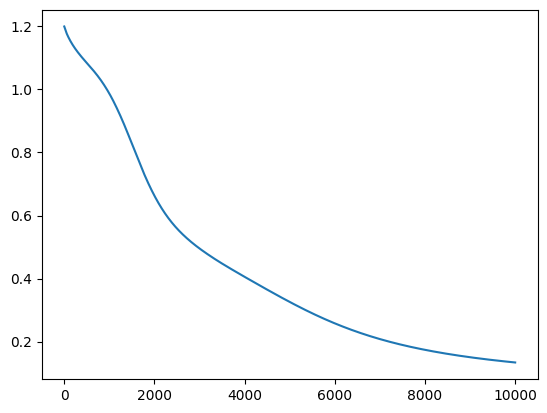

In [153]:
newt = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newt.parameters(), lr=0.001)
losses = []
for epoch in range(10000):
    optimizer.zero_grad()
    train_x = train_x.to(device)
    out = newt(train_x)
    train_y_one_hot = train_y_one_hot.float()
    out, train_y_one_hot = out.to(device), train_y_one_hot.to(device)
    loss = criterion(out, train_y_one_hot)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {}'.format(epoch, loss.item()))

plt.plot(losses)
plt.show()

In [154]:
# Predict the test data
test_x = test_x.to(device)
test_y = test_y.to(device)
out = newt(test_x)
_, predicted = torch.max(out.data, 1)
print('Predicted: ', predicted)
print('Actual: ', test_y.squeeze())

# Calculate the accuracy

correct = 0
total = len(test_x)

for i in range(total):
    if predicted[i] == test_y[i]:
        correct+=1
print('Accuracy of the network on the 30 test images: %d %%' % (100 * correct / total))


Predicted:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2], device='cuda:0')
Actual:  tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2], device='cuda:0')
Accuracy of the network on the 30 test images: 96 %
